- Array

In [1]:
import numpy as np
v1 = np.array([1,2])
v2 = np.array([3,4])
print v1*v2

[3 8]


- Matrix

In [2]:
m1 = np.mat(v1)
m2 = np.mat(v2)
print m1*m2.T

[[11]]


In [38]:
from numpy import *

def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('data/testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

def sigmoid(inX):
    return 1.0 / (1 + exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn);
    labelMat = mat(classLabels).transpose()
    m, n = shape(dataMatrix)
    # gradient
    alpha = 0.001
    maxCycles = 500
    weights = ones((n,1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights) # inner product
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights

data, label = loadDataSet()
weights = gradAscent(data, label)
print weights

[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


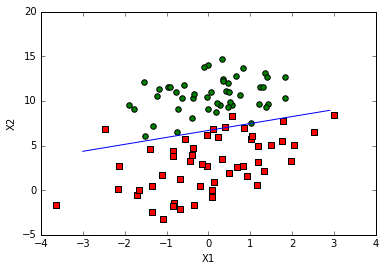

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
    
def plotBestFit(weights):
    dataMat, labelMat = loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x) / weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2')
    plt.show()
    
 
plotBestFit(weights.getA())



[ 1.01702007  0.85914348 -0.36579921]


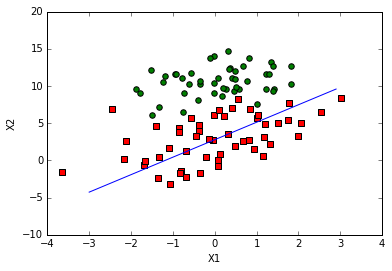

In [57]:
def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights
 
data, label = loadDataSet()
stocWeights = stocGradAscent0(array(data), label)
print stocWeights
plotBestFit(stocWeights)

[ 14.56718026   1.09045936  -2.22153822]


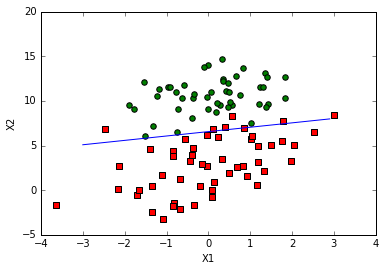

In [59]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m, n = shape(dataMatrix)
    weights = ones(n)
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4 / (1.0 + j + i) + 0.01
            randIndex = int(random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

stocWeights2 = stocGradAscent1(array(data), label)
print stocWeights2
plotBestFit(stocWeights2)

In [69]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0
        
def colicTest():
    frTrain = open('data/horseColicTraining.txt')
    frTest = open('data/horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(array(trainingSet), trainingLabels, 1000)
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights)) != int(currLine[21]):
            errorCount += 1
    errorRate = float(errorCount) / numTestVec
    print errorRate
    return errorRate

def multiTest():
    numTest = 10; errorSum = 0.0
    for k in range(numTest):
        errorSum += colicTest()
    errorRate = errorSum / float(numTest)
    
multiTest()

0.298507462687
0.432835820896
0.358208955224
0.388059701493
0.388059701493
0.417910447761
0.432835820896
0.507462686567
0.298507462687
0.522388059701


D:\ProgramFiles\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: overflow encountered in exp
